### Linear Regression Hands-On Lab Session with California Housing Dataset

In this lab session, we will perform linear regression analysis using the California housing dataset. Follow the steps and fill in the code as required.

### Step 1: Load the Data

Load the necessary libraries and the California housing dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Step 2: Understand the Data

Display the first few rows and summary statistics of the dataset.

In [4]:
# Display the first few rows of the dataset
# Fill in the code to show the first five rows
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Display summary statistics
# Fill in the code to get summary statistics
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Step 3: Remove Missing Data and Outliers

Check for missing values and remove them if necessary. Identify and handle outliers.

In [6]:
# Check for missing values
data.isnull().sum()

# Remove missing values if any
data.dropna(inplace=True)

# Identify and handle outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

### Step 4: Correlation

Calculate the correlation matrix to understand relationships between features.

In [7]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.181014,0.698658,-0.256522,-0.002466,-0.031503,-0.078629,-0.009936,0.632971
HouseAge,-0.181014,1.000000,-0.209684,-0.071658,-0.272499,-0.005069,0.004834,-0.088993,0.087911
AveRooms,0.698658,-0.209684,1.000000,-0.001579,-0.067882,0.057669,0.131869,-0.092256,0.260237
AveBedrms,-0.256522,-0.071658,-0.001579,1.000000,0.082117,-0.085343,0.034775,-0.004277,-0.099079
Population,-0.002466,-0.272499,-0.067882,0.082117,1.000000,0.209546,-0.113037,0.104769,-0.005995
AveOccup,-0.031503,-0.005069,0.057669,-0.085343,0.209546,1.000000,-0.166071,0.186429,-0.275504
Latitude,-0.078629,0.004834,0.131869,0.034775,-0.113037,-0.166071,1.000000,-0.933286,-0.150479
Longitude,-0.009936,-0.088993,-0.092256,-0.004277,0.104769,0.186429,-0.933286,1.000000,-0.043103
target,0.632971,0.087911,0.260237,-0.099079,-0.005995,-0.275504,-0.150479,-0.043103,1.000000


### Step 5: Feature Selection

Select the features that will be used for the regression model.

In [8]:
# Select relevant features and target variable
X = data.drop('target', axis=1)
y = data['target']

### Step 6: Train-Test Split

Split the dataset into training and testing sets.

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 7: Linear Regression Model Building

Build and train a linear regression model.

In [10]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)

LinearRegression()

### Step 8: Polynomial Regression
    
Extend the linear regression model to include polynomial features.

In [11]:
# Import PolynomialFeatures from sklearn
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

LinearRegression()

### Step 9: Lasso Regression with Cross-Validation

Build a Lasso regression model using cross-validation.

In [12]:
# Import LassoCV from sklearn
from sklearn.linear_model import LassoCV

# Create and fit a Lasso regression model
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)

LassoCV(cv=5)

### Step 10: Ridge Regression with Cross-Validation

Build a Ridge regression model using cross-validation.

In [13]:
# Import RidgeCV from sklearn
from sklearn.linear_model import RidgeCV

# Create and fit a Ridge regression model
ridge_model = RidgeCV(cv=5)
ridge_model.fit(X_train, y_train)

RidgeCV(cv=5)

### Step 11: Comparison of Model Performance

Compare the performance of the different models.

In [14]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_poly = poly_model.predict(poly.fit_transform(X_test))
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE for each model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Print RMSE values
print(f'Linear Regression RMSE: {rmse_linear}')
print(f'Polynomial Regression RMSE: {rmse_poly}')
print(f'Lasso Regression RMSE: {rmse_lasso}')
print(f'Ridge Regression RMSE: {rmse_ridge}')

Linear Regression RMSE: 0.5626031257062544
Polynomial Regression RMSE: 0.5195352272663203
Lasso Regression RMSE: 0.5660265501357461
Ridge Regression RMSE: 0.5626025807270937


### Step 12: Visualize the Best Fit Line of All Models
Visualize the best fit lines for the linear, polynomial, Lasso, and Ridge models.

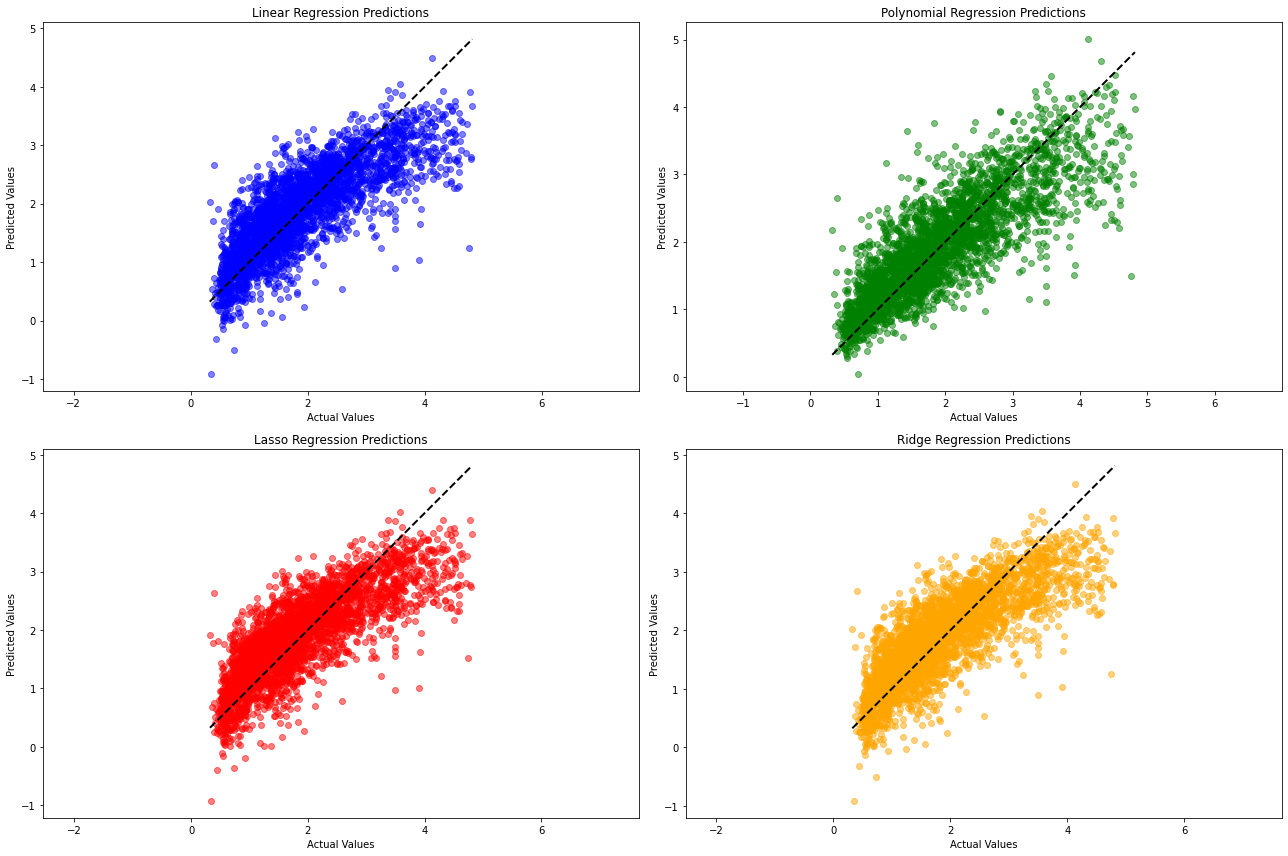

In [18]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Set the figure size for the plots
plt.figure(figsize=(18, 12))

# Linear Regression Predictions
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, linestyle='--')
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')

# Polynomial Regression Predictions
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, linestyle='--')
plt.title('Polynomial Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')

# Lasso Regression Predictions
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, linestyle='--')
plt.title('Lasso Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')

# Ridge Regression Predictions
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_ridge, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, linestyle='--')
plt.title('Ridge Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axis('equal')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()